In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
dataset = pd.read_csv('C:\data\\udemy\Social_Network_ads.csv')

X = dataset.iloc[:,2:4].values 
y = dataset.iloc[:,4].values

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

import warnings
warnings.filterwarnings('ignore')

#data preprocessing
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)


In [22]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print('accuracy score : %f' %accuracy_score(y_test,y_predict))

from sklearn.metrics import confusion_matrix
print('confusion matrix : \n%s' %confusion_matrix(y_test,y_predict))


accuracy score : 0.875000
confusion matrix : 
[[50  2]
 [ 8 20]]


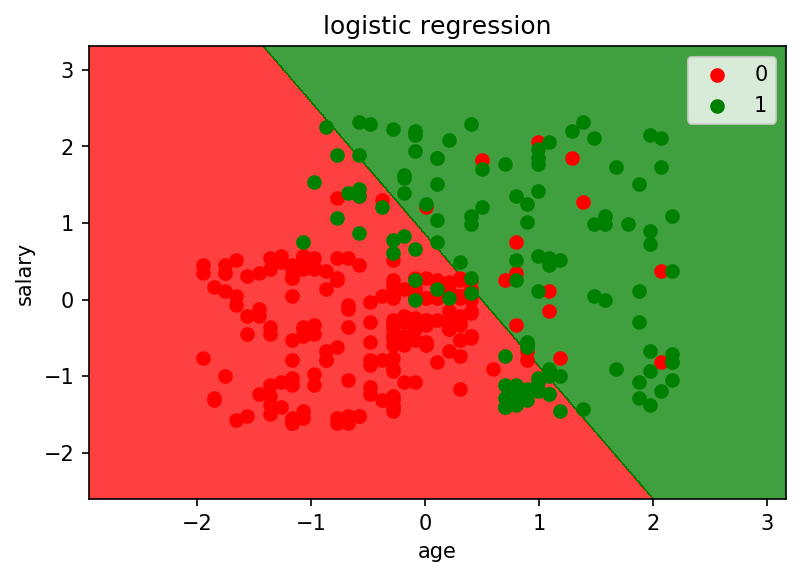

In [32]:
from matplotlib.colors import ListedColormap

X_set,y_set = X_train,y_train

X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1 , step = 0.01), 
                   np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], c = ListedColormap(('red','green'))(i), label = j)
plt.xlabel('age')
plt.ylabel('salary')
plt.title('logistic regression')
plt.legend()
plt.rcParams['figure.dpi'] = 120
plt.show()